# Lista 8 de Cálculo Numérico

In [1]:
using LinearAlgebra # Para uso da função norm
using Plots # para plotar gráficos

## Questão 1.

### a. Compressão (Thierry)

### Compressão de Dados em Matrizes

A ideia da compressão de dados é encontrarmos vetores base dentro da matriz tal que forneçam uma base para a composição de todos os dados. Porém, na vida real precisamos encontrar aproximações, visto que o uso de números reais acabam dificultando uma base L.I de poucos vetores representarem muitos dados.

Na ideia simples, transformamos a matriz em uma multiplicação de duas matrizes, tal que a primeira seja os vetores base e a segunda os coeficientes das combinações lineares.

Com a preocupação de se adequar aos números reais, começamos a analisar isso pelo erro da matriz original com a nova multiplicação das duas matrizes. Para quantificar o erro, usamos a ideia de norma de matriz, que é dada pela soma das normas de cada vetor (colunas) da matriz.

Então, temos que dado a matriz A e o vetor b, precisamos determinar c tal que 

$$min ||A - [b][c^T]|| \longrightarrow min ||[(a_1)(a_2)...(a_n)] - [c_1(b) c_2(b) ... c_n(b)]|| \longrightarrow ||(a_1 - c_1b)(a_2-c_2b)...(a_n-c_nb)||$$

Visto que $e_n = a_n - c_nb \space \bot \space c_nb$, pelo produto interno temos que $e_n^Tc_nb = 0 \longrightarrow (a_n - c_nb)^Tc_nb = 0$. Aplicando a transposta tal que $(M.Q)^T = Q^T.M^T$ e $(M - Q)^T = M^T - Q^T$ obtemos:

$$(a_n - c_nb)^Tc_nb = 0 \longrightarrow (a_n^T - (c_nb)^T)c_nb = 0 \longrightarrow a_n^Tc_nb - c_n^2b^Tb = 0 \longrightarrow a_n^Tc_nb = c_n^2b^Tb $$

Desconsiderando o caso em que $c_n = 0$ pois é um caso muito trivial, podemos dividir a equação em ambos os lados por $c_n$, resultando em:

$$a_n^Tb = c_nb^Tb \longrightarrow c_n = \frac{a_n^Tb}{b^Tb}$$

A partir da análise feita acima podemos escrever um código em Julia para achar o vetor c:

In [2]:
function melhores_coords(A,b) #retorna c tal que norm(A-b*c') é mínima
    m, n = size(A)
    A = 1.0 * A # multiplica-se por 1.0 para evitar erros de operações matriciais entre inteiros e float's.
    c = zeros(n)    
    c = A'*(b/(b'*b)) # Operação para achar o vetor c que minimiza a distância perpendicular à reta.
    return c
end

melhores_coords (generic function with 1 method)

In [3]:
A=[1.0001 10.001 3;2.01 20.3 6;3.003 30 9]

3×3 Matrix{Float64}:
 1.0001  10.001  3.0
 2.01    20.3    6.0
 3.003   30.0    9.0

In [4]:
b=[1;2;3]

3-element Vector{Int64}:
 1
 2
 3

In [5]:
c=melhores_coords(A,b)

3-element Vector{Float64}:
  1.0020785714285714
 10.04292857142857
  3.0

In [6]:
norm(A-b*c')

0.2534747564213406

In [7]:
function acha_melhor_minimizacao(A)
    n,m = size(A)

    bv = randn(n)
    cv = randn(m)
    
    bw = zeros(m)
    cw = zeros(n)
    
    for i in 1:50
        cv=melhores_coords(A, bv)
        bw=cv
        cw=melhores_coords(A', bw)
        bv=cw
    end
    
    return bv,cv
end

acha_melhor_minimizacao (generic function with 1 method)

In [8]:
function compressao(A,nível)
    m,n=size(A)
    B=zeros(m,nível)
    C=zeros(n,nível)
    
    for i=1:nível
        B[:,i], C[:,i] = acha_melhor_minimizacao(A)
        A= A - B[:,i]*C[:,i]'
    end
    return B,C
end

compressao (generic function with 1 method)

In [9]:
A = randn(3,4)

3×4 Matrix{Float64}:
 -1.7673     -0.277941  0.648435   1.06847
  0.0682925   0.228917  0.255455  -1.02237
  0.321998   -0.824582  0.891538   0.0543769

In [10]:
B,C = compressao(A,3)

([1.333154435476278 -0.03558783342166556 -0.6129878409605616; -0.3763913015616659 0.10916703017270142 -2.0938066737951324; 0.11165885794275343 0.7928936421219668 0.2607660550878557], [-1.2145548362195144 0.5073659219619088 0.21217000231237934; -0.28412636217459813 -0.9642599867070086 -0.10852958983986469; 0.44933366870364966 1.10881000925948 -0.14496785050938374; 0.9398756256685373 -0.16595133766419864 0.3106740008982255])

In [11]:
norm(A-B*C')

1.7291634505335761e-16

In [12]:
# Chance pequena de existirem colunas Linearmente Dependentes
N = 20
A = randn(N, N)
for i in 1:N
    B,C = compressao(A, i)
    print(i, ": ", norm(A-B*C'), "\n")
end

1: 17.57098851056964
2: 16.160383851112492
3: 14.68563921862958
4: 13.272557199993361
5: 12.02949158373268
6: 10.889917510902878
7: 9.698277769799825
8: 8.552353394621846
9: 7.598899427716194
10: 6.679723892405799
11: 5.711948041701329
12: 4.719347493982419
13: 3.79731920398686
14: 3.160211935831341
15: 2.474280683638202
16: 1.8285660445954925
17: 1.2126105398091247
18: 0.5362008338037308
19: 0.16810061658011421
20: 4.9118790377660025e-15


In [13]:
N = 20
A = zeros(N, N)
for i in 1:N
    A[:, i] .= i
end
for i in 1:10
    B,C = compressao(A, i)
    print(norm(A-B*C'), "\n")
end

4.8900251726869386e-14
0.0
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN


### b. Gauss-Jacobi (Vinicius)

O método utilizado será o do ponto fixo, em que iniciamos com o sistema linear:

$$A.x=b$$

Chamaremos $A=M-K$ para um $M$ facilmente invertível e um $K$ resto da matriz.

$$M.x-K.x=b \\
M.x=b+K.x \\
x=M^{-1}.b+M^{-1}.K.x$$

Chamaremos $M^{-1}.b$ de $c$ e o $M^{-1}.K$ de $R$:

$$x=R.x+c$$

Nosso método numérico a ser implementado em cima dessa equação é dar um chute inicial e ir substituindo nela:

$$x^{(0)}=chute_{inicial}$$

$$x^{(k+1)}=R.x^{(k)}+c$$

No caso específico do **Gauss-Jacobi**, a **matriz $M$ facilmente inversível é uma diagonal.**

In [42]:
# nao esta funcionando bem
function gauss_jacobi(A,b,iteracoes)
    M = Diagonal(A)
    K = M-A
    R = inv(M)*K
    c = inv(M)*b
    
    #println(M)
    #println(K)
    #println(R)
    #println(c)
    
    lin = length(b)
    x = zeros(lin,1)
    for i = 1:iteracoes
        x = R*x + c
    end
    
    return x
end

gauss_jacobi (generic function with 1 method)

In [15]:
A = [4 2 1 ; 1 5 1 ; 3 4 10]
b = [7 ; 7 ; 17]

x = gauss_jacobi(A,b,300)
println("Norma: ", norm(A*x-b))

[4 0 0; 0 5 0; 0 0 10]
[0 -2 -1; -1 0 -1; -3 -4 0]
[0.0 -0.5 -0.25; -0.2 0.0 -0.2; -0.30000000000000004 -0.4 0.0]
[1.75, 1.4000000000000001, 1.7000000000000002]
Norma: 8.881784197001252e-16


In [16]:
A = [5 2 1 -1 ; 1 3 -1 1 ; 2 0 4 1 ; 1 1 1 8]
b = [1 ; -1 ; 1 ; -3]

x = gauss_jacobi(A,b,300)
println("Norma: ", norm(A*x-b))

[5 0 0 0; 0 3 0 0; 0 0 4 0; 0 0 0 8]
[0 -2 -1 1; -1 0 1 -1; -2 0 0 -1; -1 -1 -1 0]
[0.0 -0.4 -0.2 0.2; -0.3333333333333333 0.0 0.3333333333333333 -0.3333333333333333; -0.5 0.0 0.0 -0.25; -0.125 -0.125 -0.125 0.0]
[0.2, -0.3333333333333333, 0.25, -0.375]
Norma: 1.1102230246251565e-16


### c. Gauss-Seidel (Vinicius)

In [49]:
# nao esta funcionando bem
function gauss_seidel(A,b,iteracoes)
    M = UpperTriangular(A)
    K = M-A
    R = inv(M)*K
    c = inv(M)*b
    
    #println(M)
    #println(K)
    #println(R)
    #println(c)
    
    lin = length(b)
    x = zeros(lin,1)
    for i = 1:iteracoes
        x = R*x + c
    end
    
    return x
end

gauss_seidel (generic function with 1 method)

In [18]:
A = [4 2 1 ; 1 5 1 ; 3 4 10]
b = [7 ; 7 ; 17]

x = gauss_seidel(A,b,300)
println("Norma: ", norm(A*x-b))

[4 2 1; 0 5 1; 0 0 10]
[0 0 0; -1 0 0; -3 -4 0]
[0.14500000000000002 0.06 0.0; -0.14 0.08000000000000002 0.0; -0.30000000000000004 -0.4 0.0]
[0.7949999999999998, 1.06, 1.7000000000000002]
Norma: 8.881784197001252e-16


In [19]:
A = [5 2 1 -1 ; 1 3 -1 1 ; 2 0 4 1 ; 1 1 1 8]
b = [1 ; -1 ; 1 ; -3]

x = gauss_seidel(A,b,300)
println("Norma: ", norm(A*x-b))

[5 2 1 -1; 0 3 -1 1; 0 0 4 1; 0 0 0 8]
[0 0 0 0; -1 0 0 0; -2 0 0 0; -1 -1 -1 0]
[0.24791666666666667 -0.05208333333333333 -0.05208333333333333 0.0; -0.4479166666666667 0.05208333333333333 0.05208333333333333 0.0; -0.46875 0.03125 0.03125 0.0; -0.125 -0.125 -0.125 0.0]
[0.09375000000000006, -0.09375, 0.34375, -0.375]
Norma: 2.220446049250313e-16


## Questão 2. (Thierry)

Equações:

$$2x_1 + x_2 = 2$$
$$-x_1 + 2x_2 = 2$$

Logo,

$$x_1 = 1 - \frac{x_2}{2}$$
$$x_1 = 2x_2 - 2$$

E então,

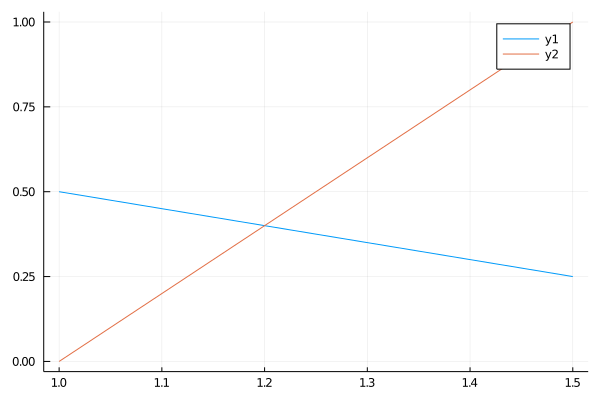

In [172]:
f(x) = 1 - x/2
g(x) = 2x - 2

P = plot([f,g], 1, 1.5)

In [173]:
A = [2 1; -1 2]
b = [2; 2]

array_x = []
array_y = []
iterador = 1
x_anterior = randn(2)
x_atual = randn(2)

while (norm(x_atual - x_anterior) >= 1e-3)
    x_anterior = x_atual
    x_atual = gauss_jacobi(A, b, iterador)
    push!(array_x, x_atual[2])
    push!(array_y, x_atual[1])
    print(x_atual, "\n")
    iterador += 1
end

print("\n", "Tolerância: ", norm(A*x_atual - b), "\n")
print("Tolerância: ", norm(x_atual - x_anterior))

[1.0; 1.0]
[0.5; 1.5]
[0.25; 1.25]
[0.375; 1.125]
[0.4375; 1.1875]
[0.40625; 1.21875]
[0.390625; 1.203125]
[0.3984375; 1.1953125]
[0.40234375; 1.19921875]
[0.400390625; 1.201171875]
[0.3994140625; 1.2001953125]
[0.39990234375; 1.19970703125]

Tolerância: 0.0006905339660024879
Tolerância: 0.0006905339660024879

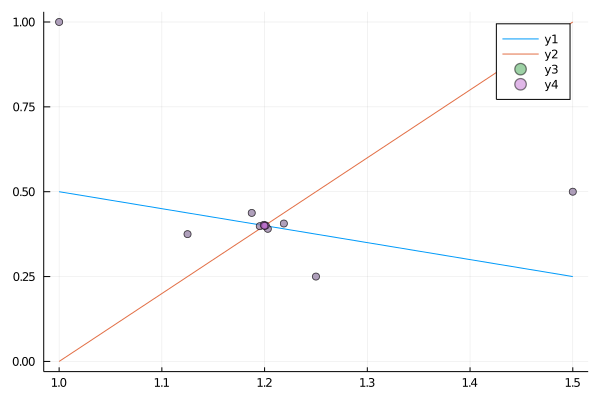

In [175]:
scatter!(P, array_x, array_y, alpha=0.5)

In [176]:
array_x = []
array_y = []

iterador = 1
x_anterior = randn(2)
x_atual = randn(2)

while (norm(x_atual - x_anterior) >= 1e-3)
    x_anterior = x_atual
    x_atual = gauss_seidel(A, b, iterador)
    push!(array_x, x_atual[2])
    push!(array_y, x_atual[1])
    print(x_atual, "\n")
    iterador += 1
end

print("\n", "Tolerância: ", norm(A*x_atual - b), "\n")
print("Tolerância: ", norm(x_atual - x_anterior))

[0.5; 1.0]
[0.375; 1.25]
[0.40625; 1.1875]
[0.3984375; 1.203125]
[0.400390625; 1.19921875]
[0.39990234375; 1.2001953125]
[0.4000244140625; 1.199951171875]

Tolerância: 0.0001220703125
Tolerância: 0.0002729575167846423

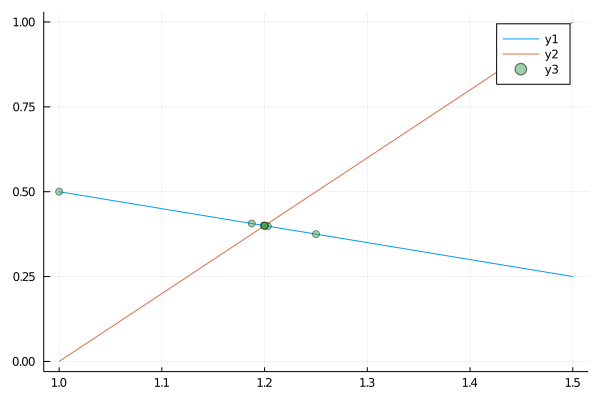

In [177]:
f(x) = 1-x/2
g(x) = 2x - 2

G = plot([f,g], 1, 1.5)

scatter!(G, array_x, array_y, alpha=0.5)

## Questão 3. (Chris)

## Questão 4. (Thierry)

Equações:

$$x_8 = x_6 + x_7 + 500$$
$$x_7 = x_5 + 3000$$
$$x_6 = x_4 + x_2$$
$$x_5 = x_3 + 3000$$
$$x_4 = x_1 + 30000$$
$$x_3 = 9000$$
$$x_2 = 3500$$
$$x_1 = 7000$$

Logo temos o sistema
$$
\begin{bmatrix} 
    0 & 0 & 0 & 0 & 0 & -1 & -1 & 1 \\
    0 & 0 & 0 & 0 & -1 & 0 & 1 & 0 \\
    0 & -1 & 0 & -1 & 0 & 1 & 0 & 0 \\
    0 & 0 & -1 & 0 & 1 & 0 & 0 & 0 \\
    -1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix} 
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 \\
    x_5 \\
    x_6 \\
    x_7 \\
    x_8 \\
\end{bmatrix}
=
\begin{bmatrix} 
    500 \\
    3000 \\
    0 \\
    3000 \\
    30000 \\
    9000 \\
    3500 \\
    7000 \\
\end{bmatrix}
$$
E então,

In [99]:
A = [0 0 0 0 0 -1 -1 1; 0 0 0 0 -1 0 1 0; 0 -1 0 -1 0 1 0 0; 0 0 -1 0 1 0 0 0; -1 0 0 1 0 0 0 0; 0 0 1 0 0 0 0 0; 0 1 0 0 0 0 0 0; 1 0 0 0 0 0 0 0]
b = [500; 3000; 0; 3000; 30000; 9000; 3500; 7000]


N = 8
NewA = zeros(N,N)
NewB = zeros(N)
for i in 1:N
    NewA[i, :] .= A[(N+1)-i, :]
    NewB[i] = b[(N+1)-i]
end

for i in 1:10
    x = gauss_jacobi(NewA,NewB, i)
    print(norm(NewA*x - NewB), "\n")
end
#print(x)

35640.566774393475
38239.377609997784
16000.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


$$
\begin{bmatrix} 
    0 & 0 & 0 & 0 & 0 & -1 & -1 & 1 & 0 \\
    0 & 0 & 0 & 0 & -1 & 0 & 1 & 0 & 0 \\
    0 & -1 & 0 & -1 & 0 & 1 & 0 & 0 & 0 \\
    0 & 0 & -1 & 0 & 1 & 0 & 0 & 0 & 1 \\
    -1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & -1 \\
    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix} 
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 \\
    x_5 \\
    x_6 \\
    x_7 \\
    x_8 \\
    x_9\\
\end{bmatrix}
=
\begin{bmatrix} 
    500 \\
    3000 \\
    0 \\
    3000 \\
    30000 \\
    9000 \\
    3500 \\
    7000 \\
\end{bmatrix}
$$

In [102]:
A = [0 0 0 0 0 -1 -1 1 0; 0 0 0 0 -1 0 1 0 0; 0 -1 0 -1 0 1 0 0 0; 0 0 -1 0 1 0 0 0 1; -1 0 0 1 0 0 0 0 -1; 0 0 1 0 0 0 0 0 0; 0 1 0 0 0 0 0 0 0; 1 0 0 0 0 0 0 0 0]
b = [500; 3000; 0; 3000; 30000; 9000; 3500; 7000]

N = 9
M = 8
NewA = zeros(M,N)
NewB = zeros(M)
for i in 1:M
    NewA[i, :] .= A[(M+1)-i, :]
    NewB[i] = b[(M+1)-i]
end

#NewA
#NewB

## Questão 5. (Chris)

## Questão 6. (Luan)

### Considere a bandeira da Grécia como uma imagem preta e branca e modele com uma matriz A.

Para modelarmos a bandeira da grécia como uma matriz, consideraremos a seguinte imagem, que preparei com muito carinho:

![bandeiraGrecia.png](attachment:bandeiraGrecia.png)

Logo teremos 

$$A = 
\begin{bmatrix} 
    1 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
\end{bmatrix}
$$

#### (a) Qual é o posto da bandeira da Grécia (tal que $A = BC^t$)? O que a matriz $B$ e matriz $C^t$ representam nesse caso? Explique com as suas próprias palavras.

$A = 
\begin{bmatrix} 
    1 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
\end{bmatrix} 
=
\begin{bmatrix}
    1 & 0 & 1 \\
    1 & 0 & 0 \\
    0 & 0 & 1 \\
    1 & 0 & 0 \\
    1 & 0 & 1 \\
    0 & 0 & 0 \\
    1 & 1 & 1 \\
    0 & 0 & 0 \\
    1 & 1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
    1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
\end{bmatrix}
$

A matriz $B$ representaria as diferentes "colunas" que a bandeira tem, que, nesse caso, são $3$, o nosso posto. $C^t$ por consequência representaria a ordem das "colunas" na bandeira.

#### (b) Determine dois países tais quais sua bandeira tem posto = 1?

Para posto = 1, podemos pensar em bandeiras horizontais, como Ucrânia, Rússia, Iémen, Indonésia, ...

#### (c) Determine dois países tais quais sua bandeira tem posto = 2?

Para posto = 2, podemos pensar em bandeiras horizontais, porém com algum detalhe simples vertical, como Dinamarca, Finlândia, Suécia, ...

#### (c) Determine dois países tais quais sua bandeira tem posto = 3?

Para posto = 3, podemos pensar em bandeiras verticais com três cores, como Bélgica, França, Chade, Guinea, ...

##### Super interessante pensar nos postos para bandeiras complicadas como a do Brasil, Japão, Arábia Saudita, ...

## Questão 7. (Vinicius)

Primeiro, fazemos a inserção da imagem:

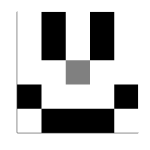

In [21]:
imagem = [0 1 0 1 0 ; 0 1 0 1 0 ; 0 0 0.5 0 0 ; 1 0 0 0 1 ; 0 1 1 1 0]
plot(Gray.(1 .- imagem), size=(150,150), axis=nothing)

Podemos descobrir o posto da imagem através da função rank:

In [22]:
rank(imagem)

3

Para níveis de compressão abaixo do posto da imagem, a nitidez é prejudicada:

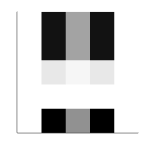

In [23]:
B,c = compressao(imagem, 1)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

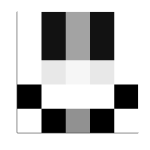

In [24]:
B,c = compressao(imagem, 2)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

A partir do nível de compressão igual ao posto da imagem a nitidez é mantida como a original.

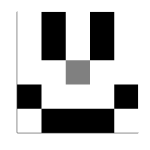

In [25]:
B,c = compressao(imagem, 3)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

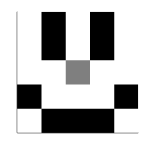

In [26]:
B,c = compressao(imagem, 4)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

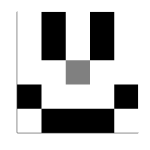

In [27]:
B,c = compressao(imagem, 5)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

## Questão 8. (Luan) 

### Encontre (ou desenhe) uma imagem A, com mais ou menos $200 × 200$ pixels (pode ser um pouco maior), que

#### (a) exija um nível de compressão maior que 3 e menor que 6 para recuperar pelo menos 99% de sua norma total.

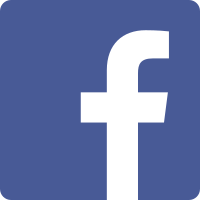

#### (b) exija um nível de compressão maior que 40 para recuperar pelo menos 99% de sua norma total.

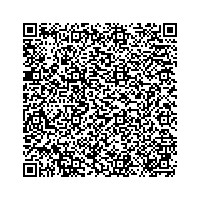